# Import Dependencies

1. Import pandas for data analysis
2. Import matplotlib for plotting
3. Import scipy for statistical analysis

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.stats as st

# Import Data

In [83]:
primary_df = pd.read_csv("./output/data_working_git.csv")
primary_df

,Unnamed: 0,Country,Year,Union %,Gini,CPI
0,0,Hungary,2009,11.9,0.245,95.369304
1,1,Hungary,2015,9.0,0.291,111.384411
2,2,Poland,2009,16.3,0.305,97.484226
3,3,Poland,2010,18.3,0.307,100.000000
4,4,Poland,2011,17.0,0.304,104.239401
...,...,...,...,...,...,...
269,269,United States,2013,10.8,0.392,106.833852
270,270,United States,2014,10.7,0.389,108.566940
271,271,United States,2015,10.6,0.384,108.695723
272,272,United States,2016,10.3,0.385,110.067028


In [75]:
#Drop unnecessary columns
primary_df=primary_df.drop(["Unnamed: 0", "CPI"], axis=1)
primary_df

,Country,Year,Union %,Gini
0,Hungary,2009,11.9,0.245
1,Hungary,2015,9.0,0.291
2,Poland,2009,16.3,0.305
3,Poland,2010,18.3,0.307
4,Poland,2011,17.0,0.304
...,...,...,...,...
269,United States,2013,10.8,0.392
270,United States,2014,10.7,0.389
271,United States,2015,10.6,0.384
272,United States,2016,10.3,0.385


In [76]:
#Rename columns
primary_df=primary_df.rename(columns={"Union %":"Union Density","Gini":"Gini Coefficient"})
primary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           274 non-null    object 
 1   Year              274 non-null    int64  
 2   Union Density     274 non-null    float64
 3   Gini Coefficient  274 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 8.7+ KB


## Group countries by region
- Western
- Eastern Europe
- Scandinavia
- USA
- East Asia
- Latin America

In [77]:
west = ['United Kingdom', 'Spain', 'Austria', 'France', 'Germany', 'Ireland', 'Switzerland', 'Italy', 'Luxembourg', 
        'Greece', 'Israel', 'Netherlands', 'Belgium', 'Australia', 'New Zealand', 'Portugal', 'Turkey', 'Canada']
east =  ['Estonia', 'Czech Republic', 'Latvia', 'Lithuania', 'Hungary', 'Slovak Republic', 'Slovenia', 'Poland'] 
scandinavian = ['Norway', 'Finland' ,'Iceland', 'Sweden', 'Denmark']
us = ['United States']
asia = ['Korea', 'Japan']
latin = ['Mexico', 'Chile']

In [78]:
#Create "regions" dict
regions = {
    "Western": west,
    "Eastern Europe": east,
    "Scandinavia": scandinavian,
    "US": us,
    "East Asia": asia,
    "Latin America": latin
}

#Create "Region" column and assign values based on "regions" dict
primary_df["Region"] = ""
for index, row in primary_df.iterrows():
    for region in regions:
        if row.Country in regions[region]: 
            primary_df.loc[index, "Region"] = region
            break
            
primary_df.head()

,Country,Year,Union Density,Gini Coefficient,Region
0,Hungary,2009,11.9,0.245,Eastern Europe
1,Hungary,2015,9.0,0.291,Eastern Europe
2,Poland,2009,16.3,0.305,Eastern Europe
3,Poland,2010,18.3,0.307,Eastern Europe
4,Poland,2011,17.0,0.304,Eastern Europe


# Assign colors to each region

In [79]:
#Create filters by region
west_df = pd.DataFrame({"Country": west})
east_df = pd.DataFrame({"Country": east})
scand_df = pd.DataFrame({"Country": scandinavian})
us_df = pd.DataFrame({"Country": us})
asia_df = pd.DataFrame({"Country": asia})
latin_df = pd.DataFrame({"Country": latin})

#Filter the primary_df
west_filter = pd.merge(primary_df, west_df, on=["Country"])
east_filter = pd.merge(primary_df, east_df, on=["Country"])
scand_filter = pd.merge(primary_df, scand_df, on=["Country"])
us_filter = pd.merge(primary_df, us_df, on=["Country"])
asia_filter = pd.merge(primary_df, asia_df, on=["Country"])
latin_filter = pd.merge(primary_df, latin_df, on=["Country"])

In [80]:
#Assign a color to the datapoints in each regional df
filtered_dict = {
    "Western": {"df": west_filter, "x":0, "y":0, "color": "cyan"},
    "Eastern Europe": {"df": east_filter, "x":0, "y":1, "color": "purple"},
    "Scandanavia": {"df":scand_filter, "x":1, "y":0, "color": "yellow"},
    "US": {"df":us_filter, "x":1, "y":1, "color": "blue"},
    "East Asia": {"df":asia_filter, "x":2, "y":0, "color": "green"},
    "Latin America": {"df":latin_filter, "x":2, "y":1, "color": "red"}
}

# Plot Gini Coefficient v Union Density by Region

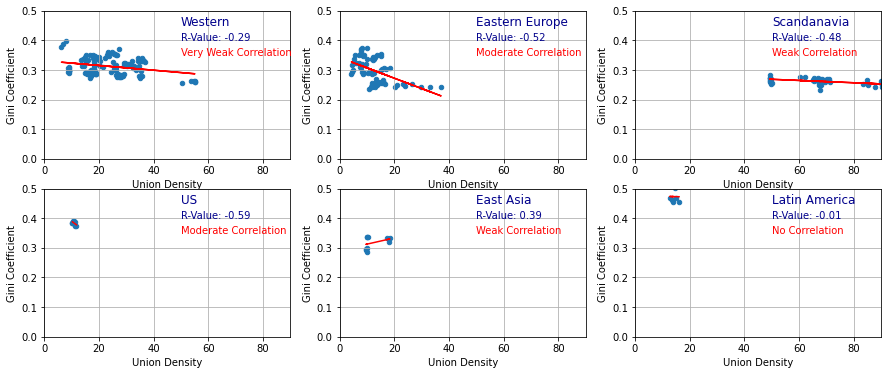

In [81]:
fig, ax = plt.subplots(2, 3, figsize=(15, 6))

i = 0
for region in filtered_dict:
    current_ax = ax[i // 3][i % 3]
    filtered_dict[region]["df"].plot.scatter(x="Union Density", y="Gini Coefficient", ax=current_ax, grid=True)
    current_ax.set_ylim(0, 0.5)
    current_ax.set_xlim(0, 90)
    
    x = filtered_dict[region]["df"]["Union Density"]
    y = filtered_dict[region]["df"]["Gini Coefficient"]
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y = {round(slope, 3)}x + {round(intercept, 2)}"
    current_ax.plot(x, regress_values, "r-")
    
    current_ax.annotate(region, (50,0.45), fontsize=12, color="darkblue")
    current_ax.annotate(f"R-Value: {round(rvalue,2)}", (50,0.40), fontsize=10, color="darkblue")
    
    correlation = "No Correlation"
    if abs(rvalue) < 0.1:
        correlation = "No Correlation"
    elif abs(rvalue) < 0.3:
        correlation = "Very Weak Correlation"
    elif abs(rvalue) < 0.5:
        correlation = "Weak Correlation"
    elif abs(rvalue) < 0.7:
        correlation = "Moderate Correlation"
    elif abs(rvalue) < 1:
        correlation = "Strong Correlation"
    current_ax.annotate(correlation, (50,0.35), fontsize=10, color="red")    
    
    i += 1
    
    plt.savefig("output/regional_regression_udvgc.png")
    
    

# Add new columns to primary_df

In [82]:
primary_df["Color"] = ""
primary_df["Group"] = ""
primary_df.head()

,Country,Year,Union Density,Gini Coefficient,Region,Color,Group
0,Hungary,2009,11.9,0.245,Eastern Europe,,
1,Hungary,2015,9.0,0.291,Eastern Europe,,
2,Poland,2009,16.3,0.305,Eastern Europe,,
3,Poland,2010,18.3,0.307,Eastern Europe,,
4,Poland,2011,17.0,0.304,Eastern Europe,,


# Assign values to the new columns based on the region

In [11]:
for index, row in primary_df.iterrows():
    if row["Country"] in west: 
        primary_df.loc[index,"Group"] = 10
        primary_df.loc[index,"Color"] = "c"
    if row["Country"] in east: 
        primary_df.loc[index,"Group"] = 50 
        primary_df.loc[index,"Color"] = "m"
    if row["Country"] in scandinavian: 
        primary_df.loc[index,"Group"] = 95
        primary_df.loc[index,"Color"] = "y"
    if row["Country"] in us: 
        primary_df.loc[index,"Group"] = 130 
        primary_df.loc[index,"Color"] = "b"
    if row["Country"] in asia: 
        primary_df.loc[index,"Group"] = 160
        primary_df.loc[index,"Color"] = "g"
    if row["Country"] in latin: 
        primary_df.loc[index,"Group"] = 190
        primary_df.loc[index,"Color"] = "r"
primary_df

,Country,Year,Union Density,Gini Coefficient,Region,Color,Group
0,Hungary,2009,11.9,0.245,Eastern Europe,m,50
1,Hungary,2015,9.0,0.291,Eastern Europe,m,50
2,Poland,2009,16.3,0.305,Eastern Europe,m,50
3,Poland,2010,18.3,0.307,Eastern Europe,m,50
4,Poland,2011,17.0,0.304,Eastern Europe,m,50
...,...,...,...,...,...,...,...
269,United States,2013,10.8,0.392,US,b,130
270,United States,2014,10.7,0.389,US,b,130
271,United States,2015,10.6,0.384,US,b,130
272,United States,2016,10.3,0.385,US,b,130


In [12]:
from matplotlib import cm
cmap = cm.get_cmap('Spectral')

In [13]:
mexico=primary_df[primary_df["Country"]=="Mexico"]
mexico

,Country,Year,Union Density,Gini Coefficient,Region,Color,Group
8,Mexico,2010,13.8,0.462,Latin America,r,190
205,Mexico,2012,14.0,0.455,Latin America,r,190
206,Mexico,2014,13.6,0.463,Latin America,r,190
207,Mexico,2016,12.7,0.467,Latin America,r,190


# Plot entire world

Text(40, 0.44, 'Weak correlation')

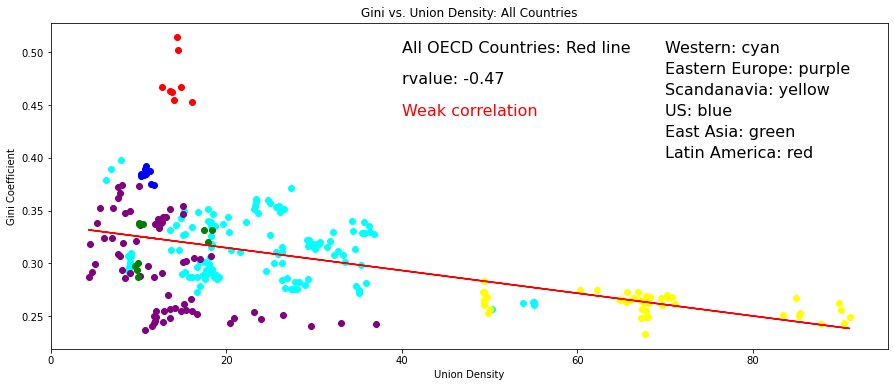

In [14]:
plt.figure(figsize=(15, 6))
i = 0
for region in filtered_dict:
    x = filtered_dict[region]["df"]["Union Density"]
    y = filtered_dict[region]["df"]["Gini Coefficient"]
    plt.scatter(x, y, c=filtered_dict[region]['color'] )
    plt.annotate(f"{region}: {filtered_dict[region]['color']}", (70, 0.5 - i*0.02), fontsize=16, color="black"  )
    i += 1

x = primary_df["Union Density"]
y = primary_df["Gini Coefficient"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.plot(x, regress_values, "r-")
plt.xlabel("Union Density")
plt.ylabel("Gini Coefficient")
plt.title("Gini vs. Union Density: All Countries")

plt.annotate("All OECD Countries: Red line", (40,0.5), fontsize=16, color="black")
#plt.annotate(line_eq, (60,0.48), fontsize=16, color="darkblue")
plt.annotate(f"rvalue: {round(rvalue,2)}", (40,0.47), fontsize=16, color="black")

correlation = "No correlation"
if abs(rvalue) > 0.25:
    correlation = "Very weak correlation"
if abs(rvalue) > 0.3:
    correlation = "Weak correlation"
elif abs(rvalue) > 0.5:
    correlation = "Moderate correlation"
elif abs(rvalue) > 0.7:
    correlation = "Strong correlation"
plt.annotate(correlation, (40,0.44), fontsize=16, color="red")    

# # print(mexico)
# data_working1 = primary_df[primary_df["Region"] != "Latin America"]
# x1 = data_working1["Union Density"]
# y1 = data_working1["Gini Coefficient"]
# (slope1, intercept1, rvalue1, pvalue1, stderr1) = st.linregress(x1, y1)
# regress_values1 = x1 * slope1 + intercept1
# line_eq1 = f"y = {round(slope1, 2)}x + {round(intercept1, 2)}"
# plt.plot(x1, regress_values1, "b-")

# plt.annotate("Without Latin: Blue line", (50,0.42), fontsize=16, color="darkblue")
# plt.annotate(line_eq1, (55,0.4), fontsize=16, color="darkblue")
# plt.annotate(f"rvalue: {round(rvalue1,2)}", (55,0.38), fontsize=16, color="darkblue")

# correlation = "No correlation"
# if abs(rvalue1) < 0.3:
#     correlation = "Very weak correlation"
# elif abs(rvalue1) < 0.5:
#     correlation = "Weak correlation"
# elif abs(rvalue1) < 0.7:
#     correlation = "Moderate correlation"
# elif abs(rvalue1) < 1:
#     correlation = "Strong correlation"
# plt.annotate(correlation, (60,0.36), fontsize=16, color="red")    

Text(60, 0.36, 'Moderate correlation')

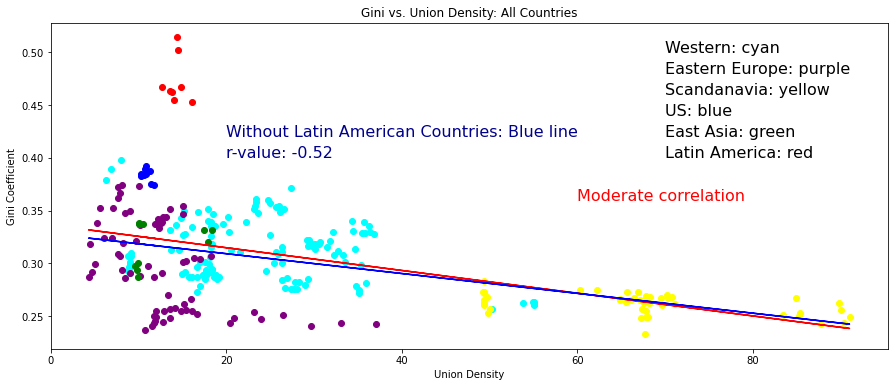

In [15]:
plt.figure(figsize=(15, 6))
i = 0
for region in filtered_dict:
    x = filtered_dict[region]["df"]["Union Density"]
    y = filtered_dict[region]["df"]["Gini Coefficient"]
    plt.scatter(x, y, c=filtered_dict[region]['color'] )
    plt.annotate(f"{region}: {filtered_dict[region]['color']}", (70, 0.5 - i*0.02), fontsize=16, color="black"  )
    i += 1

x = primary_df["Union Density"]
y = primary_df["Gini Coefficient"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.plot(x, regress_values, "r-")
plt.xlabel("Union Density")
plt.ylabel("Gini Coefficient")
plt.title("Gini vs. Union Density: All Countries")

data_working1 = primary_df[primary_df["Region"] != "Latin America"]
x1 = data_working1["Union Density"]
y1 = data_working1["Gini Coefficient"]
(slope1, intercept1, rvalue1, pvalue1, stderr1) = st.linregress(x1, y1)
regress_values1 = x1 * slope1 + intercept1
line_eq1 = f"y = {round(slope1, 2)}x + {round(intercept1, 2)}"
plt.plot(x1, regress_values1, "b-")

plt.annotate("Without Latin American Countries: Blue line", (20,0.42), fontsize=16, color="darkblue")
# plt.annotate(line_eq1, (55,0.4), fontsize=16, color="darkblue")
plt.annotate(f"r-value: {round(rvalue1,2)}", (20,0.40), fontsize=16, color="darkblue")

correlation = "No correlation"
if abs(rvalue1) < 0.3:
    correlation = "Very weak correlation"
elif abs(rvalue1) < 0.5:
    correlation = "Weak correlation"
elif abs(rvalue1) < 0.7:
    correlation = "Moderate correlation"
elif abs(rvalue1) < 1:
    correlation = "Strong correlation"
plt.annotate(correlation, (60,0.36), fontsize=16, color="red")    